In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
import cv2


In [127]:
data = pd.read_csv('train_LbELtWX\\train.csv')

In [128]:
X=[]
for i in data['id']:
    path = 'train_LbELtWX\\train\\' + str(i) + '.png'
    img = cv2.imread(path)
    img = cv2.resize(img,(28,28))
    X.append(img.astype('float32'))
    
X=np.array(X)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


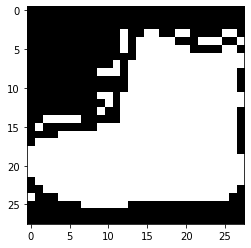

In [116]:
plt.imshow(X[0])

In [18]:
X=X / 255

In [19]:
Y=data['label']

In [45]:
Y = np.array(tf.one_hot(Y,10))

In [47]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,random_state=42,test_size=0.17)

In [48]:
X_train.shape,Y_train.shape

((49800, 28, 28, 3), (49800, 10))

In [117]:
model= tf.keras.Sequential([
# Model_1 Architecture
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(128,3,activation='relu'),
#     layers.MaxPooling2D(2),
    
#     layers.Flatten(),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(216,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),
    
# Model_2 Architecture
#     layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(3),
    
#     layers.Flatten(),
#     layers.Dense(1024,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(128,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),

# # Model_3 Architecture
    layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256,3 ,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),
    
    
])

In [118]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dropout_44 (Dropout)         (None, 256)             

In [119]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [121]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1557/1557 [==============================] - 538s 345ms/step - loss: 0.5451 - accuracy: 0.8056
Epoch 2/10
1557/1557 [==============================] - 550s 353ms/step - loss: 0.3719 - accuracy: 0.8676
Epoch 3/10
1557/1557 [==============================] - 517s 332ms/step - loss: 0.3218 - accuracy: 0.8847
Epoch 4/10
1557/1557 [==============================] - 514s 330ms/step - loss: 0.2864 - accuracy: 0.8961
Epoch 5/10
1557/1557 [==============================] - 508s 326ms/step - loss: 0.2640 - accuracy: 0.9039
Epoch 6/10
1557/1557 [==============================] - 552s 355ms/step - loss: 0.2427 - accuracy: 0.9127
Epoch 7/10
1557/1557 [==============================] - 618s 397ms/step - loss: 0.2247 - accuracy: 0.9172
Epoch 8/10
1557/1557 [==============================] - 601s 386ms/step - loss: 0.2080 - accuracy: 0.9248
Epoch 9/10
1557/1557 [==============================] - 565s 363ms/step - loss: 0.1924 - accuracy: 0.9310
Epoch 10/10
1557/1557 [=======================

In [122]:
model.evaluate(X_val,Y_val)

319/319 [==============================] - 34s 104ms/step - loss: 0.2359 - accuracy: 0.9131


[0.23592843115329742, 0.9131372570991516]

In [124]:
model.save('model_4.model',save_format='h5')